C:\Users\hskma\AppData\Local\Temp\ipykernel_23988\3101603906.py:33: RuntimeWarning: overflow encountered in scalar multiply
  row[index] += row[index] * (-row[f'P_R_{q1}_{1-q2}']) - row[f'P_R_{1-q1}_{q2}'] - row[f'P_R_{1-q1}_{1-q2}'] - row[f'P_S_{1-q1}_{q2}'] - row[f'P_S_{1-q1}_{1-q2}'] - row[f'P_I_{1-q1}_{q2}'] - row[f'P_I_{1-q1}_{1-q2}']
C:\Users\hskma\AppData\Local\Temp\ipykernel_23988\3101603906.py:17: RuntimeWarning: overflow encountered in scalar multiply
  row[index] += row[index] * (-row[f'P_S_{q1}_{1-q2}']) - row[f'P_S_{1-q1}_{q2}'] - row[f'P_S_{1-q1}_{1-q2}'] - row[f'P_I_{q1}_{q2}'] * (pi1(q1, q_values) * beta_values[0] + pi2(q2, q_values) * beta_values[1]) - (pi1(q1, q_values) + pi2(q2, q_values)) * (row[f'P_I_{q1}_{1-q2}'] + row[f'P_I_{1-q1}_{q2}'] + row[f'P_I_{1-q1}_{1-q2}']) - row[f'P_R_{q1}_{1-q2}'] - row[f'P_R_{1-q1}_{q2}'] - row[f'P_R_{1-q1}_{1-q2}']
C:\Users\hskma\AppData\Local\Temp\ipykernel_23988\3101603906.py:17: RuntimeWarning: invalid value encountered in scalar 

DataFrame:
          P_S_0_0       P_S_0_1       P_S_1_0       P_S_1_1       P_I_0_0  \
0   -3.327848e-01 -3.070983e-01  6.285384e-01  4.619602e-01  5.000000e-02   
1   -1.010410e+01 -1.279079e+01  2.232392e+01  1.158069e+01 -8.338576e-01   
2    1.007943e+03  1.389880e+04 -1.353009e+04  1.417569e+05 -2.942168e+01   
3   -7.130041e+10  9.909189e+14 -9.909170e+14  1.404683e+20 -1.412625e+05   
4    1.002568e+39 -9.934638e+53  9.934638e+53 -1.395502e+74 -1.404683e+20   
..            ...           ...           ...           ...           ...   
995           NaN           NaN           NaN           NaN           NaN   
996           NaN           NaN           NaN           NaN           NaN   
997           NaN           NaN           NaN           NaN           NaN   
998           NaN           NaN           NaN           NaN           NaN   
999           NaN           NaN           NaN           NaN           NaN   

          P_I_0_1       P_I_1_0       P_I_1_1       P_R_0_0     

f:\Code\venv\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


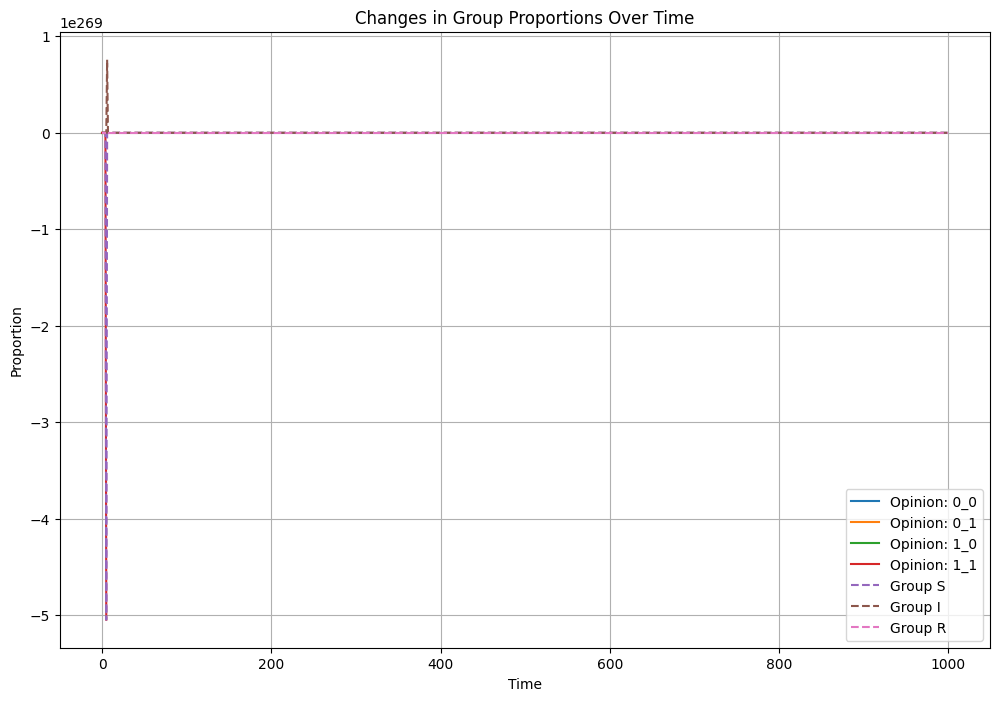

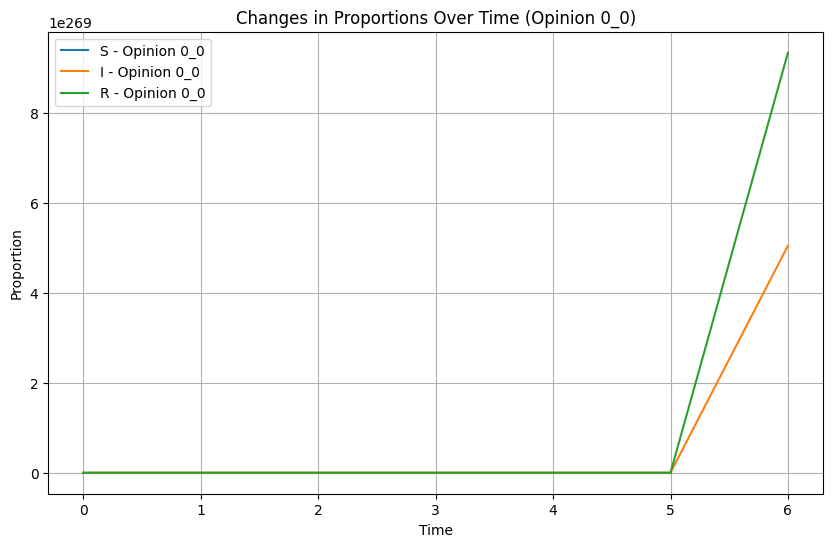

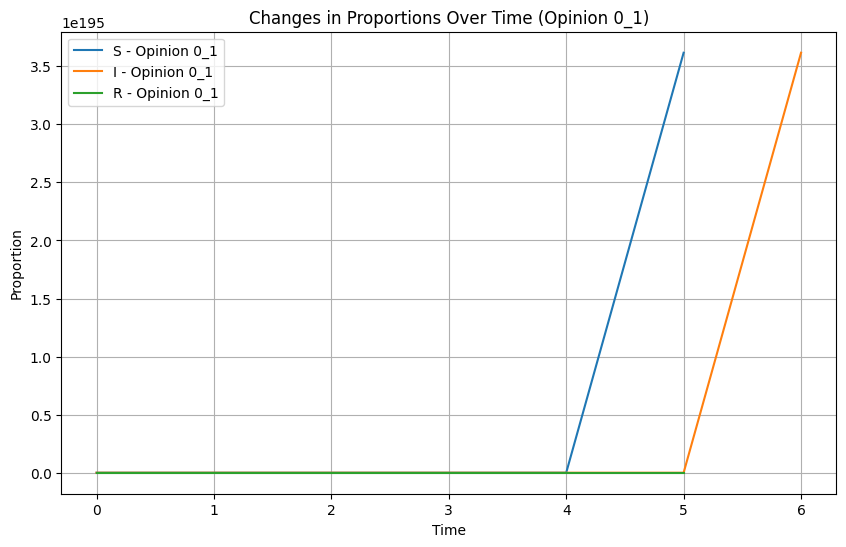

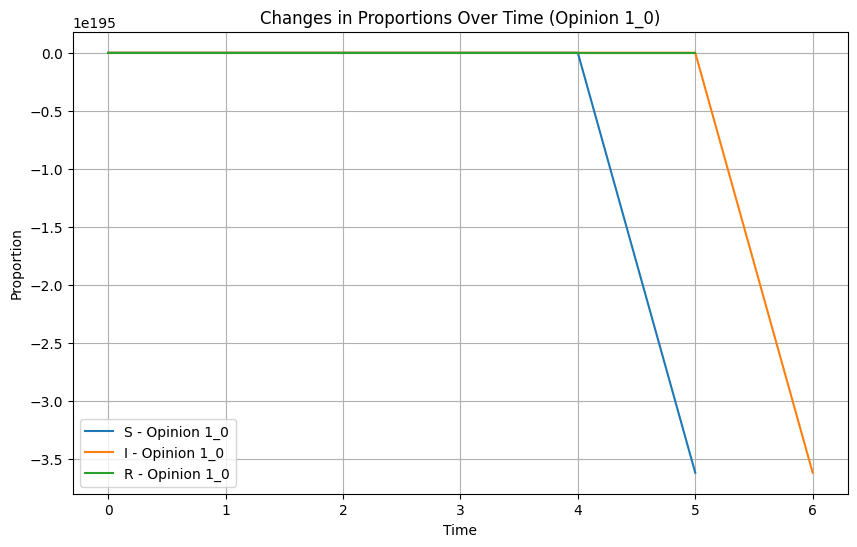

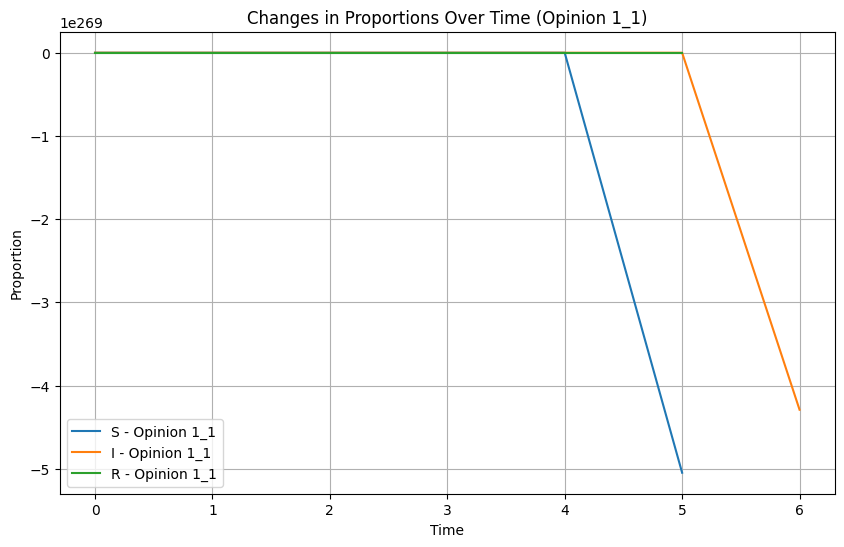

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Function to calculate pi1 and pi2
def pi1(q, q_values):
    return np.exp(q_values[q]) / np.sum(np.exp(q_values))

def pi2(q, q_values):
    return np.exp(q_values[q]) / np.sum(np.exp(q_values))

# Function to update proportions for group S
def update_proportions_S(row, q_values, beta_values):
    for q1 in range(len(q_values)):
        for q2 in range(len(q_values)):
            index = f'P_S_{q1}_{q2}'
            row[index] += row[index] * (-row[f'P_S_{q1}_{1-q2}']) - row[f'P_S_{1-q1}_{q2}'] - row[f'P_S_{1-q1}_{1-q2}'] - row[f'P_I_{q1}_{q2}'] * (pi1(q1, q_values) * beta_values[0] + pi2(q2, q_values) * beta_values[1]) - (pi1(q1, q_values) + pi2(q2, q_values)) * (row[f'P_I_{q1}_{1-q2}'] + row[f'P_I_{1-q1}_{q2}'] + row[f'P_I_{1-q1}_{1-q2}']) - row[f'P_R_{q1}_{1-q2}'] - row[f'P_R_{1-q1}_{q2}'] - row[f'P_R_{1-q1}_{1-q2}']
    return row

# Function to update proportions for group I
def update_proportions_I(row, q_values, gamma):
    for q1 in range(len(q_values)):
        for q2 in range(len(q_values)):
            index = f'P_I_{q1}_{q2}'
            row[index] += row[index] * (-row[index]) * gamma - row[f'P_I_{q1}_{1-q2}'] - row[f'P_I_{1-q1}_{q2}'] - row[f'P_I_{1-q1}_{1-q2}'] - row[f'P_S_{q1}_{q2}'] * gamma - row[f'P_S_{q1}_{1-q2}'] - row[f'P_S_{1-q1}_{q2}'] - row[f'P_S_{1-q1}_{1-q2}'] - row[f'P_R_{q1}_{q2}'] * gamma - row[f'P_R_{q1}_{1-q2}'] - row[f'P_R_{1-q1}_{q2}'] - row[f'P_R_{1-q1}_{1-q2}']
    return row

# Function to update proportions for group R
def update_proportions_R(row, q_values):
    for q1 in range(len(q_values)):
        for q2 in range(len(q_values)):
            index = f'P_R_{q1}_{q2}'
            row[index] += row[index] * (-row[f'P_R_{q1}_{1-q2}']) - row[f'P_R_{1-q1}_{q2}'] - row[f'P_R_{1-q1}_{1-q2}'] - row[f'P_S_{1-q1}_{q2}'] - row[f'P_S_{1-q1}_{1-q2}'] - row[f'P_I_{1-q1}_{q2}'] - row[f'P_I_{1-q1}_{1-q2}']
    return row

# Function to simulate the system
def simulate(time_steps, initial_values, q_values, beta_values, gamma):
    # Create DataFrame to store proportions
    df = pd.DataFrame(index=range(time_steps), columns=initial_values.keys(), dtype=float)
    df.loc[0] = initial_values
    
    # Simulation loop
    for t in range(1, time_steps):
        # Update proportions for group S
        df.loc[t] = update_proportions_S(df.loc[t-1], q_values, beta_values)
        # Update proportions for group I
        df.loc[t] = update_proportions_I(df.loc[t], q_values, gamma)
        # Update proportions for group R
        df.loc[t] = update_proportions_R(df.loc[t], q_values)
    
    return df

# Function to plot the proportions for a specific opinion combination
def plot_opinion_combination(df, q1, q2):
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df[f'P_S_{q1}_{q2}'], label=f'S - Opinion {q1}_{q2}')
    plt.plot(df.index, df[f'P_I_{q1}_{q2}'], label=f'I - Opinion {q1}_{q2}')
    plt.plot(df.index, df[f'P_R_{q1}_{q2}'], label=f'R - Opinion {q1}_{q2}')
    plt.xlabel('Time')
    plt.ylabel('Proportion')
    plt.title(f'Changes in Proportions Over Time (Opinion {q1}_{q2})')
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to plot the proportions
def plot_proportions(df, q_values):
    plt.figure(figsize=(12, 8))
    
    # Plot for each opinion combination
    for q1 in q_values:
        for q2 in q_values:
            index = f'P_S_{q1}_{q2}'
            plt.plot(df.index, df[index], label=f'Opinion: {q1}_{q2}')
    
    # Calculate and plot overall proportions for groups S, I, and R
    overall_S = df[[f'P_S_{q1}_{q2}' for q1 in q_values for q2 in q_values]].sum(axis=1)
    overall_I = df[[f'P_I_{q1}_{q2}' for q1 in q_values for q2 in q_values]].sum(axis=1)
    overall_R = df[[f'P_R_{q1}_{q2}' for q1 in q_values for q2 in q_values]].sum(axis=1)
    plt.plot(df.index, overall_S, label='Group S', linestyle='--')
    plt.plot(df.index, overall_I, label='Group I', linestyle='--')
    plt.plot(df.index, overall_R, label='Group R', linestyle='--')

    plt.xlabel('Time')
    plt.ylabel('Proportion')
    plt.title('Changes in Group Proportions Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()


# Define initial values, beta values, and gamma
initial_values = {
    'P_S_0_0': 0.2,
    'P_S_0_1': 0.2,
    'P_S_1_0': 0.2,
    'P_S_1_1': 0.2,
    'P_I_0_0': 0.05,
    'P_I_0_1': 0.05,
    'P_I_1_0': 0.05,
    'P_I_1_1': 0.05,
    'P_R_0_0': 0.0,
    'P_R_0_1': 0.0,
    'P_R_1_0': 0.0,
    'P_R_1_1': 0.0
}

beta_values = [0.4, 0.5]
gamma = 0.15

# Define opinions
q_values = [0, 1]

# Simulate the system
time_steps = 1000
df = simulate(time_steps, initial_values, q_values, beta_values, gamma)

# Display the DataFrame
print("DataFrame:")
print(df)

# Plot the proportions
plot_proportions(df, q_values)

# Plot the proportions for each opinion combination
for q1 in q_values:
    for q2 in q_values:
        plot_opinion_combination(df, q1, q2)
